SALARY DATA - SIMPLE LINEAR REGRESSION

In [ ]:
# upload files ke lembar kerja
from google.colab import files
files.upload()

Saving Salary_Data.csv to Salary_Data.csv


{'Salary_Data.csv': b'YearsExperience,Salary\r\n1.1,39343.00\r\n1.3,46205.00\r\n1.5,37731.00\r\n2.0,43525.00\r\n2.2,39891.00\r\n2.9,56642.00\r\n3.0,60150.00\r\n3.2,54445.00\r\n3.2,64445.00\r\n3.7,57189.00\r\n3.9,63218.00\r\n4.0,55794.00\r\n4.0,56957.00\r\n4.1,57081.00\r\n4.5,61111.00\r\n4.9,67938.00\r\n5.1,66029.00\r\n5.3,83088.00\r\n5.9,81363.00\r\n6.0,93940.00\r\n6.8,91738.00\r\n7.1,98273.00\r\n7.9,101302.00\r\n8.2,113812.00\r\n8.7,109431.00\r\n9.0,105582.00\r\n9.5,116969.00\r\n9.6,112635.00\r\n10.3,122391.00\r\n10.5,121872.00\r\n'}

In [ ]:
# import modul yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# read data
data = pd.read_csv('/content/Salary_Data.csv')

# DATA NDERSTANDING

In [ ]:
# tampilkan data
data.head(6)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [ ]:
# info tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# deskripsi tentang data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# ukuran data
data.shape

(30, 2)

In [ ]:
# frekuensi tiap value yang dala dalam kolom YearsExperience
data['YearsExperience'].value_counts()

2.000000    2
1.788854    2
2.664583    1
1.483240    1
1.414214    1
1.048809    1
1.702939    1
2.024846    1
3.000000    1
3.240370    1
2.258318    1
2.449490    1
1.923538    1
2.213594    1
2.302173    1
3.082207    1
2.863564    1
2.607681    1
2.810694    1
2.428992    1
3.098387    1
2.121320    1
1.224745    1
2.949576    1
3.209361    1
1.974842    1
1.140175    1
1.732051    1
Name: YearsExperience, dtype: int64

In [ ]:
# frekuensi tiap value yang dala dalam kolom Salary
data['Salary'].value_counts()

330.803567    1
260.649190    1
288.249892    1
247.206392    1
199.727314    1
208.626460    1
324.933839    1
238.916303    1
302.882816    1
337.360341    1
349.844251    1
238.656657    1
198.350700    1
233.334524    1
194.244691    1
251.431899    1
253.860198    1
256.961087    1
342.007310    1
313.485247    1
306.496330    1
245.254969    1
349.101704    1
236.207536    1
214.953483    1
237.995798    1
285.242003    1
335.611382    1
239.142217    1
318.279751    1
Name: Salary, dtype: int64

# DATA VISUALIZATION

### plot distribusi data
untuk melihat distribusi dari data, apakah data berdistribusi normal atau tidak

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


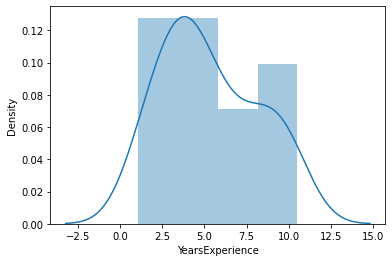

In [ ]:
# distribusi plot YearsExperience
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


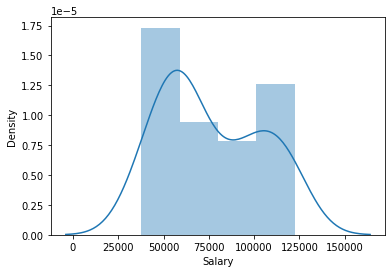

In [ ]:
# distribusi plot Salary
sns.distplot(data['Salary'])

Karena bentuk kurva distribusinya condong kekenan atau memiliki bentuk moderate positif, sehingga nantinya kolom YearsExperience dan Salary akan ditransformasi agar datanya berdistribusi normal dan memiliki bentuk kurva yang simetri.

### Count plot data
untuk melihat frekuensi tiap unique data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


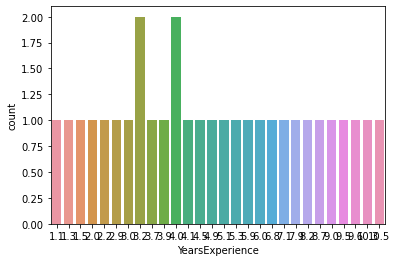

In [ ]:
# countplot YearsExperience
sns.countplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


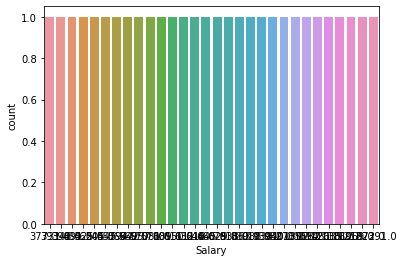

In [ ]:
# countplot Salary
sns.countplot(data['Salary'])

In [ ]:
# lihat korelasi antar variabel
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970541
Salary,0.970541,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


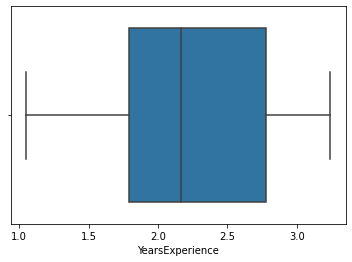

In [ ]:
# boxplot YearsExperience
sns.boxplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


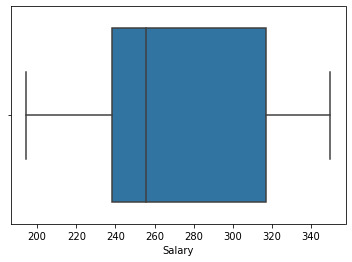

In [ ]:
# boxplot Salary
sns.boxplot(data['Salary'])

# Lihat sebaran data
untuk melihat sebaran data apakah data berdistribusi linier atau tidak.

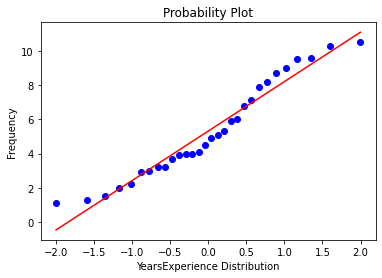

<Figure size 432x288 with 0 Axes>

In [ ]:
# melihat sebaran data YearsExperience
stats.probplot(data['YearsExperience'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('YearsExperience Distribution')
image = plt.figure()
plt.show()

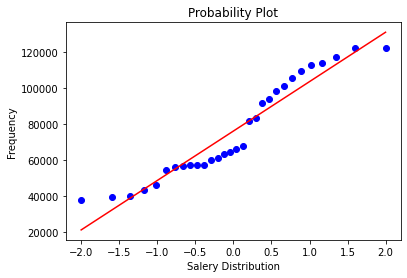

<Figure size 432x288 with 0 Axes>

In [ ]:
# melihat sebaran data Salary
stats.probplot(data['Salary'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('Salery Distribution')
image = plt.figure()
plt.show()

Karena bentuk sebaran datanya mendekati bentuk garis lurus sehingga pada kasus ini model yang nantinya digunakan adalah model linier.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

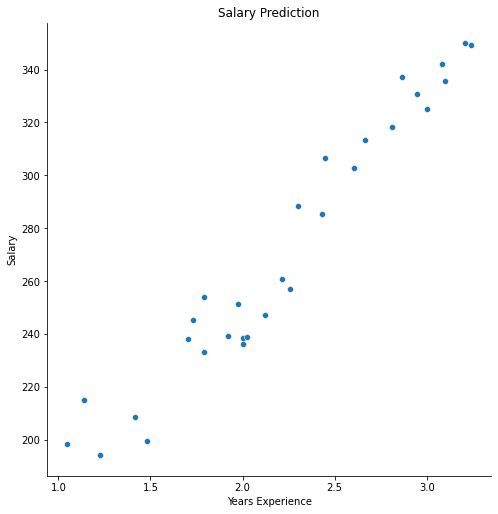

In [ ]:
# sebaran data YearsExperience dan Salary
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

# DATA PREPARATION
Dalam model regresi linier ada beberapa hal yang harus dipastikan sebelum membuat model antara lain :
1. linieritas data
2. normalitas data
4. outlier 



### Handling Missing value

In [ ]:
# cek missing value
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

Tidak terdapat missing value pada data ini.

### Data Transformation

In [ ]:
# transformasikan kolom YearsExperience ke bentuk sqrt(x)
data["YearsExperience"] = np.sqrt(data["YearsExperience"])

# tampilkan data yang telah ditransformasi
data["YearsExperience"]

0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: YearsExperience, dtype: float64

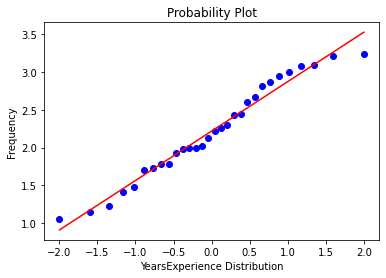

<Figure size 432x288 with 0 Axes>

In [ ]:
#recek linieritas data
stats.probplot(data['YearsExperience'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('YearsExperience Distribution')
image = plt.figure()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


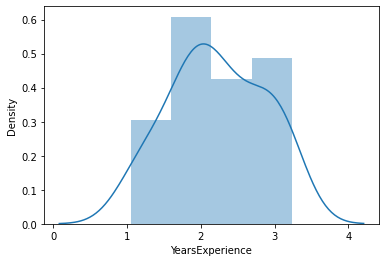

In [ ]:
# recek normalitas datanya
sns.distplot(data['YearsExperience'])

In [ ]:
# transformasi Salary ke bentuk sqrt(x)
data['Salary'] = np.sqrt(data['Salary'])

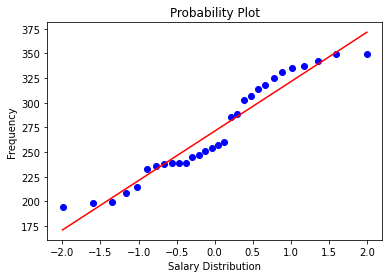

<Figure size 432x288 with 0 Axes>

In [ ]:
#recek linieritas data
stats.probplot(data['Salary'], plot=plt)
plt.ylabel('Frequency')
plt.xlabel('Salary Distribution')
image = plt.figure()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


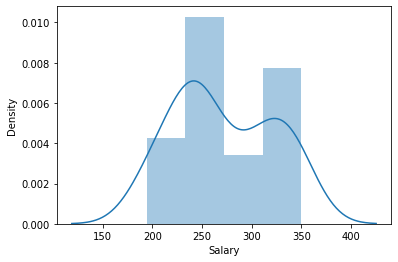

In [ ]:
# recek distribusi Salary
sns.distplot(data['Salary'])

# Modeling
Model yang akan dibuat adalah model regresi linier sederhana

### Split data
bagi data menjadi data train dan data test

In [ ]:
# tentukan variebel dependen dan independenya
X = data['YearsExperience']
y = data['Salary']

In [ ]:
# bagi data menjadi 80% data train dan 20% data test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=42)

In [ ]:
# cek ukuran X_train dan X_test
print('Ukuran X_train :', X_train.shape)
print('Ukuran X_test :', X_test.shape)

Ukuran X_train : (24,)
Ukuran X_test : (6,)


In [ ]:
# buat tabel baru X_train dan X_test
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# fit model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediksi nilai y 
y_pred = lr.predict(X_test)
y_pred

array([336.39506214, 270.10645916, 318.802173  , 276.74275849,
       238.28495774, 248.37547916])

### Evaluasi model yang telah dibuat dengan melihat nilai mse (mean square error)

In [ ]:
# hitung mse hasil predikssi
mse = mean_squared_error(y_test,y_pred)
mse

149.11917693408148

In [ ]:
# hitung nilai score r2 nya
r2 = r2_score(y_test,y_pred)
r2

0.9003137054925894

In [ ]:
# nilai Koefisien regresi dan intersepnya
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 104.26406274670927
Coefficient of the line: [74.9199579]


### Model Regresi linier sederhana
y = a + bx
dengan nilai :
*  a (intersep) = 104.26406274670927
*  b (koefisien regresi) = 74.9199579

maka model yang diperoleh yaitu :

# y = 104.26406274670927 + 74.9199579x